In [1]:
# IMPORTS
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy.solvers.ode as ode
import sympy as sym

In [2]:
# Parameters of the system
theta = sym.symbols("θ")
dtheta = sym.symbols("dθ")
l ,m, g = [1,1,9.8]
L = sym.symbols("L")

In [3]:
U =  m * g * l * (1-sym.cos(theta)) 
T = 1/2 * m * dtheta**2
lagr = T-U 

In [66]:
lagr

0.5*dθ**2 + 9.8*cos(θ) - 9.8

In [65]:
ddtheta = sym.diff(lagr,theta)
dddtheta = sym.diff(lagr,dtheta)

In [67]:
print(ddtheta)
print(dddtheta)

-9.8*sin(θ)
1.0*dθ


In [56]:
f = sym.lambdify((theta,dtheta), [ddtheta/dddtheta])
fV = np.vectorize(f)

In [ ]:
#mddx = -glmsinx
# w= np.arcsin(-1*ddtheta/(g*l))
# dtheta = w
upperlim = 10000
numpoints = 40 * upperlim +1

def derivatives1(t, X, m, l, g):
    theta, w = X
    derivs = np.array(f)#np.array([w, np.sin(-1*np.arcsin(theta/(g*l)))])
    return derivs



res1 = solve_ivp(derivatives1, [0, upperlim], [sym.pi/2,m*g],t_eval=np.linspace(0,upperlim,numpoints),args=(1,1,9.8))

1.5707963267948966 ,  1.4098166035973878
1.593013781127162 ,  1.4075193901872844
1.7164702376890286 ,  1.3947381809181265
1.7890618283689015 ,  1.3872094610629737
2.1517583301977923 ,  1.3494255281252066
2.2161057435977107 ,  1.3426900726501432
2.296466103179702 ,  1.3342636353648873
2.2964520234272743 ,  1.3342651132230692
3.742363158387642 ,  1.1789734349816257
4.441152980750115 ,  1.1004681246723016
7.929437766406938 ,  0.6281325404898143
8.551738384526475 ,  0.5102419537856496
9.308256394056892 ,  0.3181297330214464
9.289609488941512 ,  0.32415772638073304
11.696823938767164 ,  nan
12.875716438754571 ,  nan
nan ,  nan
nan ,  nan
nan ,  nan
nan ,  nan
9.771052378906642 ,  0.07688035155550796
10.010785234892191 ,  nan
11.221688037091011 ,  nan
nan ,  nan
nan ,  nan
nan ,  nan
9.385898066934537 ,  0.2917405826980196
9.43400281237117 ,  0.27415855684576135
9.674550782520033 ,  0.16017705735652166
9.717356171424527 ,  0.1299609415446831
9.770776760621333 ,  0.07724566523688314
9.7706929

C:\Users\Sorin\AppData\Local\Temp\ipykernel_29116\3094183042.py:9: RuntimeWarning: invalid value encountered in arcsin
  derivs = np.array([w, np.sin(-1*np.arcsin(theta/(g*l)))])
C:\Users\Sorin\AppData\Local\Temp\ipykernel_29116\3094183042.py:14: RuntimeWarning: invalid value encountered in arccos
  print(theta, ", ", np.arccos(theta/(g*l)))
C:\Users\Sorin\AppData\Local\Temp\ipykernel_29116\3094183042.py:16: RuntimeWarning: invalid value encountered in arccos
  derivs = np.array([w, np.sin(-1*np.arccos(theta/(g*l)))])


In [47]:
res1.t

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 ])

Text(0, 0.5, 'x')

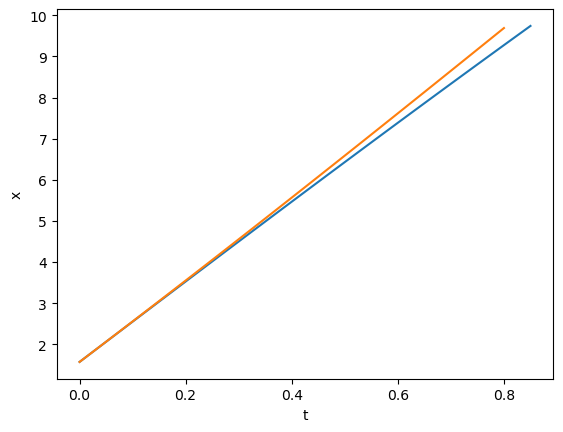

In [48]:
plt.close("all")
t1 = res1.t
x1 = res1.y[0,:]

t2 = res2.t
x2 = res2.y[0,:]

fig, ax = plt.subplots()

ax.plot(t1,x1)
ax.plot(t2,x2)
ax.set_xlabel('t')
ax.set_ylabel('x')